# Feature Engineering on Movies data
* The main goal of this project is to perform feature engineering on the movie-recommendation dataset to generate useful features which can be used in machine learning projects and recommendation systems.
* The secondary goal is to make a word cloud to show the most popular genres, frequently used words in movie titles and the years where most of the movies belong in the dataset.
* Dataset Link - https://www.kaggle.com/datasets/bandikarthik/movie-recommendation-system

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud # To plot a word cloud

## Loading In the dataset

In [2]:
df_movies = pd.read_csv("movies.csv")

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The `movies` dataset has:
* `movieId` - Unique Id for each movie
* `title` - Title of the movie
* `genres` - The genres that a particular movie belongs to

In [4]:
df_ratings = pd.read_csv("ratings.csv")

In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


The `ratings` dataset has:
* `userId` - Unique Id for each user
* `movieId` - Unique Id for each movie
* `rating` - The rating provided by each user for the movie
* `timestamp` - Unique timestamp at which each rating was provided

## Checking for the null values in both the datasets

In [6]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

The movies dataset has no null values.

In [7]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

The ratings dataset also has no null values.

## Cleaning the `genres` column in the `movies` dataset
Specifically saving the genres in a a list so that we can plot a word cloud.

In [8]:
genres = df_movies['genres'].unique()

In [9]:
total_genres = []
for g in genres:
    g = g.split("|")
    if g not in total_genres:
        total_genres.append(g)

In [10]:
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

We have now split the `genres` on "|" and appended it to a list `total_genres`. We will use this list later to plot a word cloud.

## Cleaning the `title` column
Specifically seperating the `year` from the `title` and then plotting the `title` and `year` in word clouds.

In [11]:
df_movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [12]:
df_movies.title[0][:-7]

'Toy Story'

In [13]:
df_movies.title[0][-5:-1]

'1995'

In [14]:
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-5:-1])

In [15]:
df_movies['title'] = title
df_movies['year'] = year

In [16]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [17]:
'title'[:5],'year'[:5]

('title', 'year')

In [18]:
df_movies['year'].value_counts()

2009    374
2008    346
2007    325
2010    317
2006    312
       ... 
1920      2
1916      1
1915      1
1919      1
1902      1
Name: year, Length: 101, dtype: int64

## Plotting out the word clouds for `total_genres`, `title`, and `year`

In [19]:
word_cloud_genre = WordCloud(width=1500, height=1000, background_color='black', min_font_size=3, min_word_length=3).generate(str(total_genres))
word_cloud_title = WordCloud(width=1500, height=1000, background_color='brown', min_font_size=3, min_word_length=3).generate(str(title))
word_cloud_year = WordCloud(width=1500, height=1000, background_color='gray', min_font_size=3).generate(str(year))

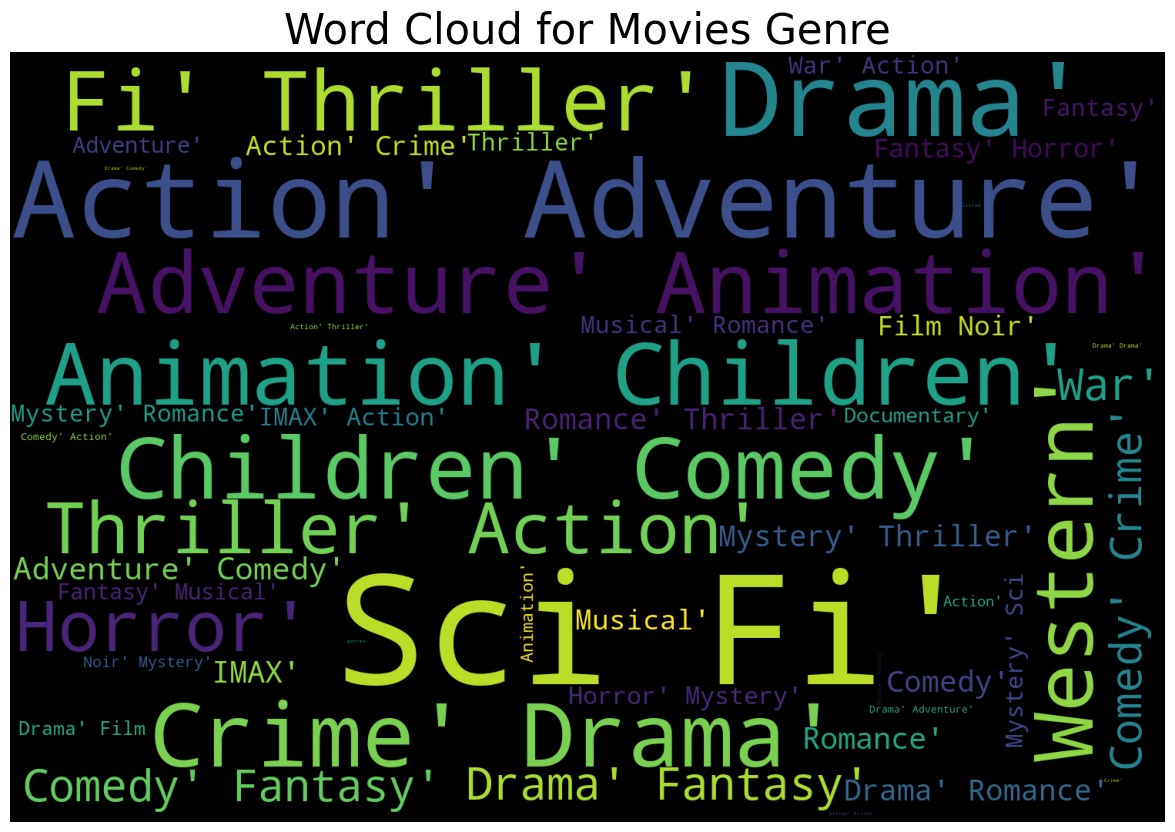

In [20]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

From the above word cloud we can see that Sci Fi movies is the most popular genre.

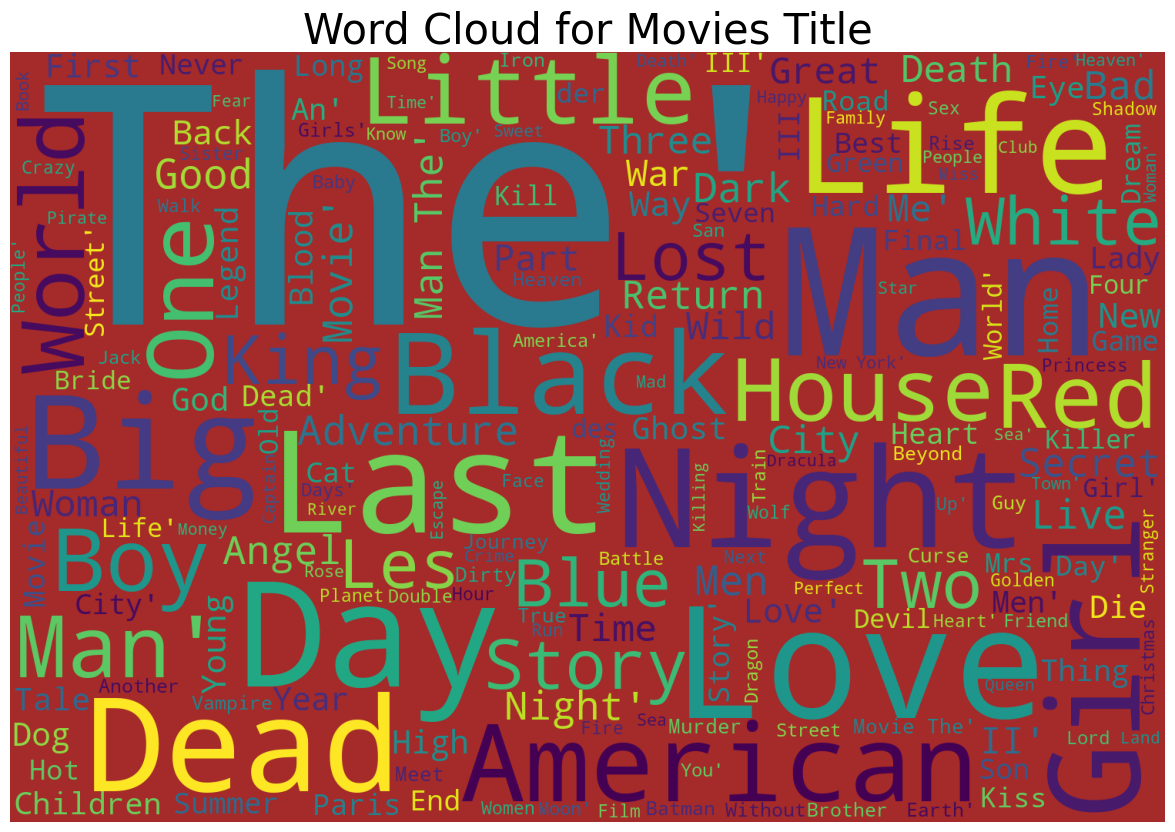

In [21]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

From the above plot we can see that the word "the" appears the most in movie titles.

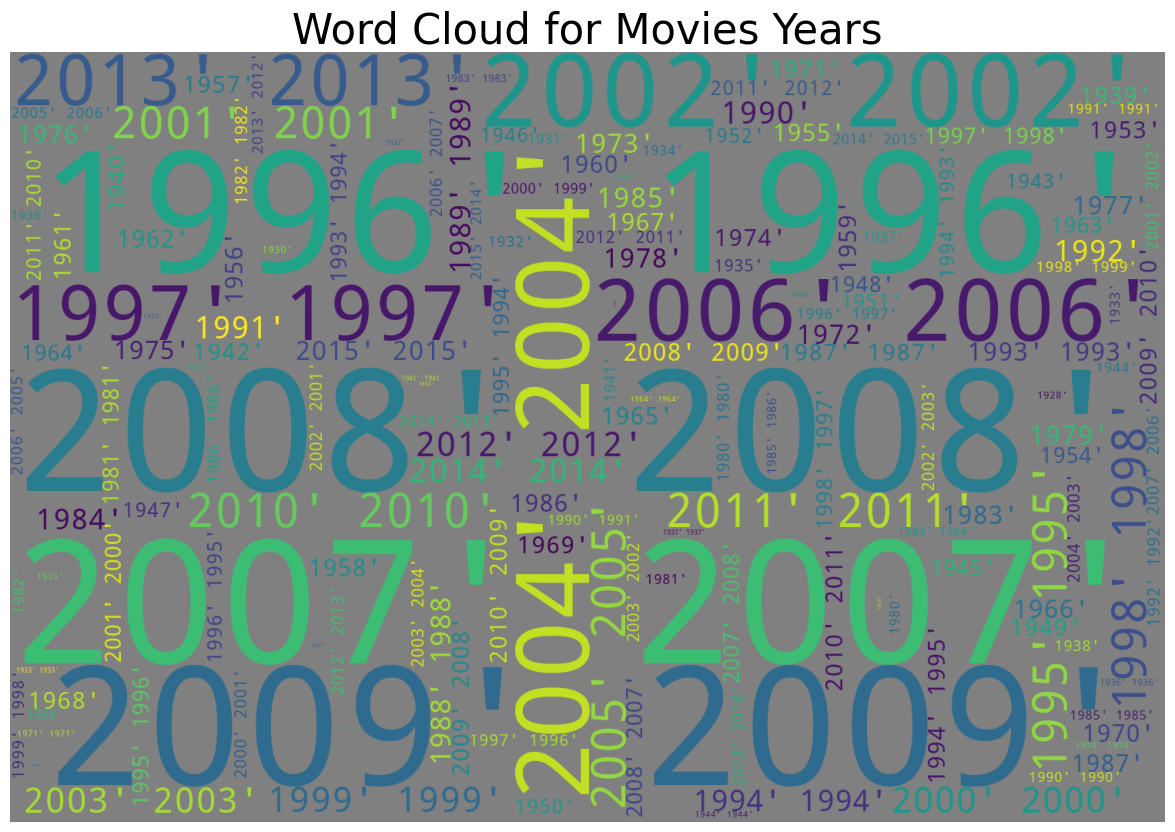

In [22]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Years',fontsize=30)
plt.imshow(word_cloud_year);

From the above plot we can that the years 1996, 2009, 2008 and 2007 are the most common years.

## Now we have to merge `df_ratings` and `df_movies`
We do this with the help of the merge function in pandas.

We use the `left` merge on the `movieId` column.

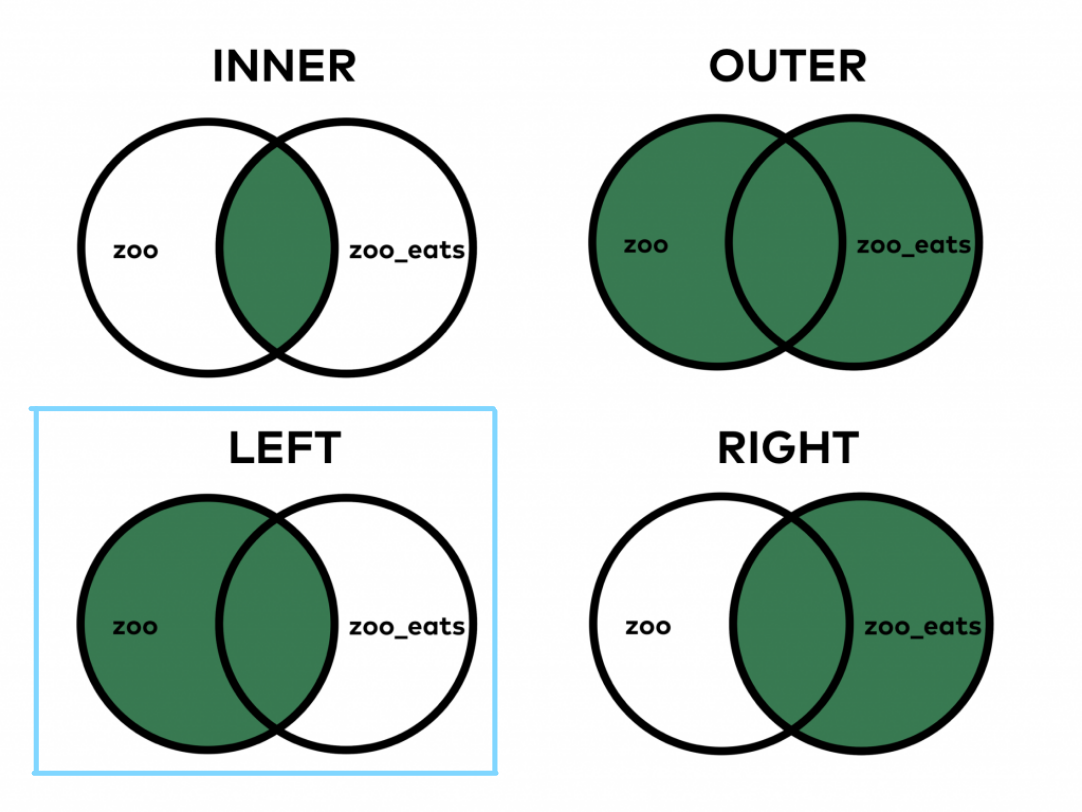
Source - https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdata36.com%2Fwp-content%2Fuploads%2F2018%2F08%2F4-pandas-merge-inner-outer-left-right-1024x771.png&f=1&nofb=1

In [23]:
df_merged = pd.merge(df_ratings, df_movies, how='left', on='movieId')

In [24]:
df_merged.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,16,4.0,1217897793,Casino,Crime|Drama,1995
1,1,24,1.5,1217895807,Powder,Drama|Sci-Fi,1995
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller,1995
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en),Mystery|Thriller,1995
4,1,50,4.0,1217896523,"Usual Suspects, The",Crime|Mystery|Thriller,1995


## Now after merging we see the top rated movies with the help of average review.
`Average review = Sum of all reviews / Count of all the reviews`

We use the groupby method to get the count/number of reviews for each movie title.

In [25]:
df_count_review = df_merged.groupby(['title'])[['rating']].count()

In [26]:
df_count_review

,rating
title,
'71,1
'Hellboy': The Seeds of Creation,1
'Round Midnight,1
'Til There Was You,3
"'burbs, The",20
...,...
loudQUIETloud: A Film About the Pixies,1
xXx,24
xXx: State of the Union,7


We use the groupby method to get the sum of reviews for each movie title.

In [27]:
df_sum_review = df_merged.groupby(['title'])[['rating']].sum()

In [28]:
df_sum_review

,rating
title,
'71,3.5
'Hellboy': The Seeds of Creation,3.0
'Round Midnight,2.5
'Til There Was You,12.0
"'burbs, The",62.5
...,...
loudQUIETloud: A Film About the Pixies,4.5
xXx,71.0
xXx: State of the Union,14.5


We check if the index matches for `df_count_review` and `df_sum_review` so that **numpy broadcasting** can be done on them.

In [29]:
df_count_review.index == df_sum_review.index

array([ True,  True,  True, ...,  True,  True,  True])

We now get the average/weighted review by dividing the sum and count.

In [30]:
df_weighted_review = df_sum_review / df_count_review

In [31]:
df_weighted_review.head(15)

,rating
title,
'71,3.500000
'Hellboy': The Seeds of Creation,3.000000
'Round Midnight,2.500000
'Til There Was You,4.000000
"'burbs, The",3.125000
'night Mother,3.000000
(500) Days of Summer,3.932432
*batteries not included,3.318182
...And Justice for All,3.650000


Now we get the top 15 weighted reviews.

In [32]:
top_15_weighted_review = df_weighted_review.nlargest(15,'rating')

In [33]:
top_15_weighted_review

,rating
title,
21 Up,5.0
50 Children: The Rescue Mission of Mr. And Mrs. Kraus,5.0
Air,5.0
Andrei Rublev (Andrey Rublyov),5.0
Animal Farm,5.0
Austenland,5.0
Barenaked in America,5.0
"Beast of War, The (Beast, The)",5.0
Being Human,5.0


## Now we create a `df_final` which is the `title` and `movieId` with `rating_counts` and `weighted_review`, `movie year` and `sum_review`

### To do so we first create a dataframe `df_new_feat` with `Title`, `Review Count`, `Sum of Reviews` and `Weighted Reviews`

In [34]:
df_new_feat = pd.DataFrame({ 'Review Count': df_count_review['rating'], 'Sum of Reviews': df_sum_review['rating'], 'Weighted Reviews': df_weighted_review['rating']})

In [35]:
df_new_feat.head()

,Review Count,Sum of Reviews,Weighted Reviews
title,,,
'71,1,3.5,3.500
'Hellboy': The Seeds of Creation,1,3.0,3.000
'Round Midnight,1,2.5,2.500
'Til There Was You,3,12.0,4.000
"'burbs, The",20,62.5,3.125


In [36]:
df_new_feat = df_new_feat.reset_index()

A Dataframe `df_new_feat` with the newly feature engineered columns has been created

In [37]:
62.5 / 20 # checking if our calculations are right

3.125

In [38]:
len(df_merged)

105339

In [39]:
len(df_new_feat)

10007

### It is now time to merge the already merged `df_merged` which has info from `df_movies` and `df_ratings` with `df_new_feat` which has feature engineered columns to make `df_final` using `pd.merge` with right merge on the title column.

In [40]:
df_final = pd.merge(df_merged, df_new_feat, how='right', on='title')

In [41]:
df_final.head()

,userId,movieId,rating,timestamp,title,genres,year,Review Count,Sum of Reviews,Weighted Reviews
0,458,117867,3.5,1426074834,'71,Action|Drama|Thriller|War,2014,1,3.5,3.5
1,251,97757,3.0,1363372860,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,2004,1,3.0,3.0
2,668,26564,2.5,1173424491,'Round Midnight,Drama|Musical,1986,1,2.5,2.5
3,118,779,3.0,1045334734,'Til There Was You,Drama|Romance,1997,3,12.0,4.0
4,160,779,4.0,902695520,'Til There Was You,Drama|Romance,1997,3,12.0,4.0


In [42]:
df_merged[df_merged['movieId'] == 117867]

,userId,movieId,rating,timestamp,title,genres,year
66778,458,117867,3.5,1426074834,'71,Action|Drama|Thriller|War,2014


We now drop the `userId`, `movieId` and `timestamp` columns using the `pd.drop` funtion.

In [43]:
df_final = df_final.drop(['userId','movieId','timestamp'], axis=1)

In [44]:
df_final.head()

,rating,title,genres,year,Review Count,Sum of Reviews,Weighted Reviews
0,3.5,'71,Action|Drama|Thriller|War,2014,1,3.5,3.5
1,3.0,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,2004,1,3.0,3.0
2,2.5,'Round Midnight,Drama|Musical,1986,1,2.5,2.5
3,3.0,'Til There Was You,Drama|Romance,1997,3,12.0,4.0
4,4.0,'Til There Was You,Drama|Romance,1997,3,12.0,4.0


Now we have created a subset `df_final` from `df_movies` and `df_ratings` which has more information than the oringinal dataframes which can be used in the future for machine learning and for recommender systems.